In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, filters, exposure
from skimage.filters.rank import entropy
from skimage.morphology import disk
from skimage.util import img_as_ubyte
import os
from skimage.filters import threshold_otsu

In [3]:
ROOT_DIR = "C:\\Adrianov\\Projects\\Project-Satanael\\"
DEMO_DIR = os.path.join(ROOT_DIR, 'attack_demo')
APRICOT_TEST_DIR = os.path.join(ROOT_DIR, 'data', 'APRICOTv1.0', 'Images', 'Test')

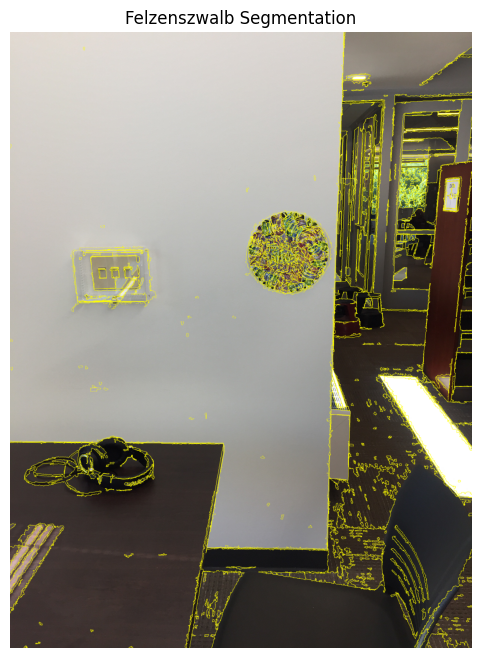

In [89]:
import matplotlib.pyplot as plt
from skimage import io, segmentation, color
from skimage import graph
from skimage.util import img_as_float

# Load image
impath = os.path.join(APRICOT_TEST_DIR, 'frc3_9.jpg')
image = img_as_float(io.imread(impath))

# Apply Felzenszwalb segmentation
segments = segmentation.felzenszwalb(image, scale=200, sigma=0.5, min_size=100)

# Mark boundaries on the original image
segmented_image = segmentation.mark_boundaries(image, segments)

# Plot the result
plt.figure(figsize=(8, 8))
plt.imshow(segmented_image)
plt.title('Felzenszwalb Segmentation')
plt.axis('off')
plt.show()


In [116]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.filters import unsharp_mask
%matplotlib inline

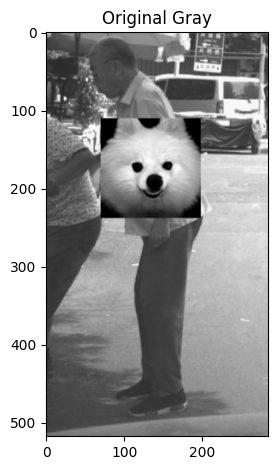

In [196]:
import requests
impath = os.path.join(DEMO_DIR, 'smaller(2).png')
img = cv2.imread(impath)
# url = "https://cdn.discordapp.com/attachments/525610785938997278/1397246875794407528/image.png?ex=6881070e&is=687fb58e&hm=fd6b1c969764b0fa74932a9d99ebfc5169965ae5d21637ba7ea228deb87b9c0f"
# response = requests.get(url)
# image_data = np.frombuffer(response.content, np.uint8)
# img = cv2.imdecode(image_data, cv2.IMREAD_COLOR)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.title("Original Gray")
plt.imshow(gray, cmap='gray')

plt.tight_layout()
plt.show()


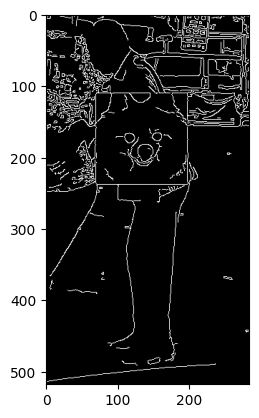

In [197]:
v = np.median(gray)
sigma = 0.33
lower = int(max(0, (1.0 - sigma) * v))
upper = int(min(255, (1.0 + sigma) * v))
bfilter = cv2.bilateralFilter(gray, 11, 17, 17)
edge = cv2.Canny(gray, lower, upper)
plt.imshow(cv2.cvtColor(edge, cv2.COLOR_BGR2RGB))

In [198]:
keypoints = cv2.findContours(edge.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
import imutils
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key = cv2.contourArea, reverse = True)

In [199]:
locations = []
for contour in contours:
    approx =  cv2.approxPolyDP(contour, 10, False)
    if len(approx) == 4:
        print('found')
        locations.append(approx)

found
found
found
found
found
found
found


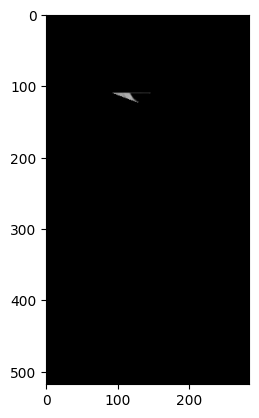

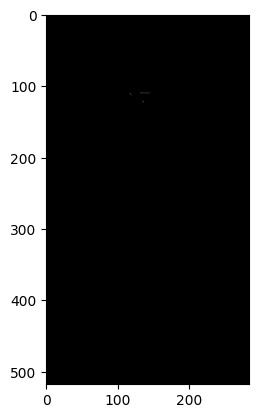

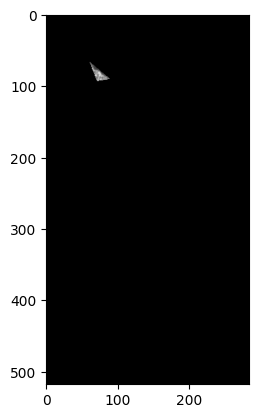

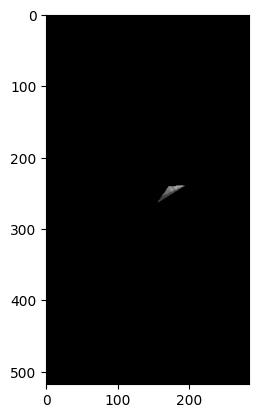

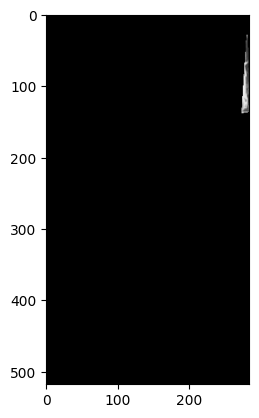

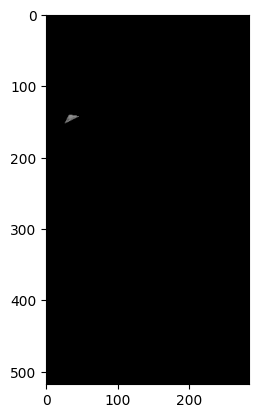

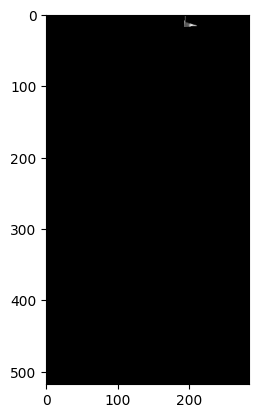

In [200]:
for loc in locations:
    mask = np.zeros(gray.shape, np.uint8)
    new_image = cv2.drawContours(mask, [loc], 0,255,-1)
    new_image = cv2.bitwise_and(gray, gray, mask=mask)
    plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
    plt.show()